# FDS PadhAI Course: Interval Estimators

We have learned in the class that the interval estimator of population mean $\mu$ is given by,

$Pr \left(\bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right) \simeq (1-\alpha)$ .

This is how we express **confidence interval** because it specifies an interval in which $\mu$ is located and the corresponding confidence/probability.

Here, $\bar{X}$ is the sample mean, $n$ is the sample size, $\sigma$ is the population standard deviation which is known in this case, $z_{\alpha/2}$ is such that its $z$-score value is $= \alpha/2$ (from the $z$-score table lookup). In the real world problem the confidence/probability $p = (1-\alpha)$ is given.

**Exercise:** Write a python code by taking different values of $\alpha$ (i.e., confidence/probability, $p = 1-\alpha$), plot the shaded ared in the $z$-score distribution or standard normal distribution, compute the interval for $\mu$.  

In [ ]:
# For several values of alpha. Note, confidence/probability = p = (1 - alpha).

import numpy as np
from scipy.integrate import quad

# The standard normal distribution (SND) or the distribution of z.
f = lambda z: 1/np.sqrt(2*np.pi) * np.exp(-z**2 / 2)

# Computet the confidence interval for different confidence/probability values, p = 1 - alpha.
for alpha in [0.2, 0.1, 0.05, 0.02, 0.01]:
    p = 1 - alpha
    for limit in np.arange(0, 5, 0.001):
        area = quad(f, -limit, limit)   # area under the SND
        # print(area)
        if np.round(area[0], 3) == p:   # round upto 3 decimel places.
            print('The confidence interval for confidence/probability p =', p, 'is =', [-limit, limit])
            break


The confidence interval for confidence/probability p = 0.8 is = [-1.281, 1.281]
The confidence interval for confidence/probability p = 0.9 is = [-1.643, 1.643]
The confidence interval for confidence/probability p = 0.95 is = [-1.956, 1.956]
The confidence interval for confidence/probability p = 0.98 is = [-2.318, 2.318]
The confidence interval for confidence/probability p = 0.99 is = [-2.559, 2.559]


## t-distribution plots

In the interval estimator of population mean $\mu$ with unknown population standard deviation $\sigma$, we replace the unknown $\sigma$ with the sample S.D. $S_{n-1} = S$ which led us to define a new statistic: the **$t$-score** or **$t$-random variable** $T_{n-1}$ with $(n-1)$ degrees of freedom (d.o.f.) is given by,

$T_{n-1} = \frac{\bar{X} - \mu}{S/\sqrt{n}}$

The distribution of $T_{n-1}$ is known as **student's $t$-distribution**.

Earlier we had the $z$-score: $Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ (when $\sigma$ is known). This is also the standard normal variable.

The only difference between the $t$-score and $z$-score is in the denominator having $S$ (sample S.D.) and $\sigma$ (population S.D.), respectively.

When the sample size $n$ is very large, $S$ converges to $\sigma$ which we will see in the following codes and in that case the distribution of $T_{n-1}$ start look very similar to the distribution of $Z$ which is the standard normal distribution (SND). Thus for large $n$, the student's $t$-distribution with $(n-1)$ d.o.f. converges to the SND $N(0,1)$. The difference should be large for small values of sample size $n$.

**Exercise:** What is the PDF of $t$-random variable $T_{n-1}$?

**Steps:**
Write a python code using the following steps:

1. Choose a normal distribution $N(\mu, \sigma)$ with some mean $\mu$ and S.D. $\sigma$.

2. Choose $n = 5$ (say). Take random $n$ sample values. Compute the statistics: sample mean ($\bar{X}$), sample S.D. ($S_{n-1} = S$).

3. Compute the $t$-score: $T_{n-1} = \frac{\bar{X} - \mu}{S/\sqrt{n}}$.

4. Repeat the process for 100000 samples (number of samples).

5. Plot the histogram of the statistic $T_{n-1}$. This is an approximation of the PDF of $T_{n-1}$ with $(n-1)$ d.o.f.

6. Also do the steps:1-5 for different values of sample size $n = 1, 2, 3, 4, 10, 30$ etc.

Note that to get the sample S.D. $S_{n-1} = S$ (unbiased estimator of the population S.D. $\sigma$) we have to divide by $(n-1)$ which can be done using **`np.std(sample, ddof = 1)`** function. Notice that we have not used the default value of ddof = 0 as the divisor udes in the calculations is = $(n-ddof)$.

Number of samples =  100000
Mean or average of sample mean across all the samples =  10.00025851171169
Mean or average of sample SD across all the samples =  1.6027482569211067


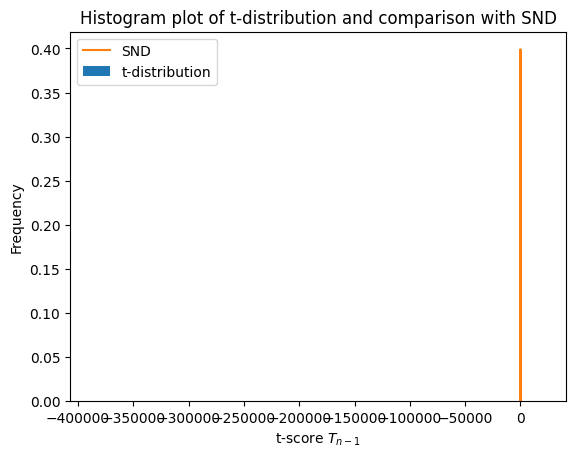

In [ ]:
# t-distribution when sample size n = 2.

import numpy as np
import matplotlib.pyplot as plt

# Random sample from normal distribution. Let's take mean = 4 and S.D. = 1.
# print(np.random.normal(0, 1, size = 3))

# Population mean mu and population standard deviation sigma
mu = 10
sigma = 2

# Normal distribution.
x = np.linspace(-8, 8, 100000)
SND = (1 / np.sqrt(2*np.pi)) * np.exp(-(x**2) / 2)

# Sample size
n = 2

sample_mean_list = []
sample_SD_list = []
for i in range(100000):
    sample = np.random.normal(mu, sigma, size = n)
    sample_mean_list.append(np.mean(sample))
    sample_SD_list.append(np.std(sample, ddof = 1))   # ddof = number of degrees of freedom. The divisor used in the calculations is = (n - ddof), where n = sample size and by defualt ddof = 0. So to get unbiased estimate of the sample S.D. we have divide by (n-1) and hence ddof should be 1.

sample_mean_array = np.array(sample_mean_list)
sample_SD_array = np.array(sample_SD_list)
print('Number of samples = ', np.size(sample_SD_array))

t_score = (sample_mean_array - mu) / (sample_SD_array / np.sqrt(n))

# print('The array of sample SD values of all the samples: ', sample_SD_array)
print('Mean or average of sample mean across all the samples = ', np.mean(sample_mean_array))
print('Mean or average of sample SD across all the samples = ', np.mean(sample_SD_array))


# Plot

plt.hist(t_score, bins = 50, density = True)   # density = True returns relative freqiency insted of total frequency.
plt.plot(x, SND)
plt.xlabel('t-score $T_{n-1}$')
plt.ylabel('Frequency')
plt.title('Histogram plot of t-distribution and comparison with SND')
plt.legend(['SND', 't-distribution'])
plt.show()


Number of samples =  100000
Mean or average of sample mean across all the samples =  10.004259830926085
Mean or average of sample SD across all the samples =  1.7701526290149305


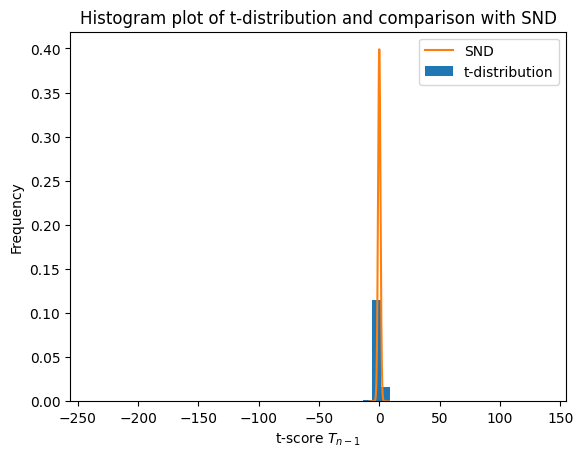

In [ ]:
# t-distribution when sample size n = 3.

import numpy as np
import matplotlib.pyplot as plt

# Random sample from normal distribution. Let's take mean = 4 and S.D. = 1.
# print(np.random.normal(0, 1, size = 3))

# Population mean mu and population standard deviation sigma
mu = 10
sigma = 2

# Normal distribution.
x = np.linspace(-8, 8, 100000)
SND = (1 / np.sqrt(2*np.pi)) * np.exp(-(x**2) / 2)

# Sample size
n = 3

sample_mean_list = []
sample_SD_list = []
for i in range(100000):
    sample = np.random.normal(mu, sigma, size = n)
    sample_mean_list.append(np.mean(sample))
    sample_SD_list.append(np.std(sample, ddof = 1))   # ddof = number of degrees of freedom. The divisor used in the calculations is = (n - ddof), where n = sample size and by defualt ddof = 0. So to get unbiased estimate of the sample S.D. we have divide by (n-1) and hence ddof should be 1.

sample_mean_array = np.array(sample_mean_list)
sample_SD_array = np.array(sample_SD_list)
print('Number of samples = ', np.size(sample_SD_array))

t_score = (sample_mean_array - mu) / (sample_SD_array / np.sqrt(n))

# print('The array of sample SD values of all the samples: ', sample_SD_array)
print('Mean or average of sample mean across all the samples = ', np.mean(sample_mean_array))
print('Mean or average of sample SD across all the samples = ', np.mean(sample_SD_array))


# Plot

plt.hist(t_score, bins = 50, density = True)   # density = True returns relative freqiency insted of total frequency.
plt.plot(x, SND)
plt.xlabel('t-score $T_{n-1}$')
plt.ylabel('Frequency')
plt.title('Histogram plot of t-distribution and comparison with SND')
plt.legend(['SND', 't-distribution'])
plt.show()


Number of samples =  100000
Mean or average of sample mean across all the samples =  9.995493206170055
Mean or average of sample SD across all the samples =  1.8807519891032087


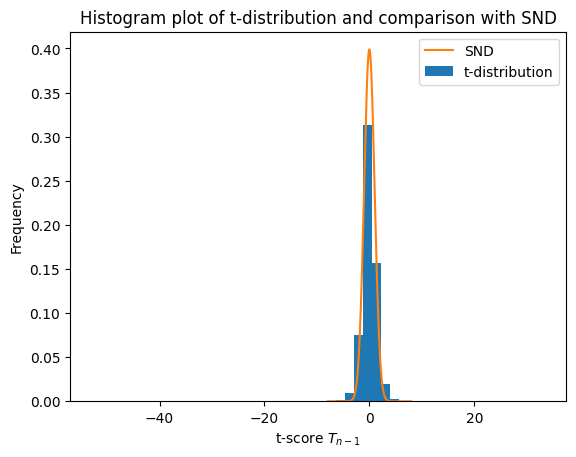

In [ ]:
# t-distribution when sample size n = 5.

import numpy as np
import matplotlib.pyplot as plt

# Random sample from normal distribution. Let's take mean = 4 and S.D. = 1.
# print(np.random.normal(0, 1, size = 3))

# Population mean mu and population standard deviation sigma
mu = 10
sigma = 2

# Normal distribution.
x = np.linspace(-8, 8, 100000)
SND = (1 / np.sqrt(2*np.pi)) * np.exp(-(x**2) / 2)

# Sample size
n = 5

sample_mean_list = []
sample_SD_list = []
for i in range(100000):
    sample = np.random.normal(mu, sigma, size = n)
    sample_mean_list.append(np.mean(sample))
    sample_SD_list.append(np.std(sample, ddof = 1))   # ddof = number of degrees of freedom. The divisor used in the calculations is = (n - ddof), where n = sample size and by defualt ddof = 0. So to get unbiased estimate of the sample S.D. we have divide by (n-1) and hence ddof should be 1.

sample_mean_array = np.array(sample_mean_list)
sample_SD_array = np.array(sample_SD_list)
print('Number of samples = ', np.size(sample_SD_array))

t_score = (sample_mean_array - mu) / (sample_SD_array / np.sqrt(n))

# print('The array of sample SD values of all the samples: ', sample_SD_array)
print('Mean or average of sample mean across all the samples = ', np.mean(sample_mean_array))
print('Mean or average of sample SD across all the samples = ', np.mean(sample_SD_array))


# Plot

plt.hist(t_score, bins = 50, density = True)   # density = True returns relative freqiency insted of total frequency.
plt.plot(x, SND)
plt.xlabel('t-score $T_{n-1}$')
plt.ylabel('Frequency')
plt.title('Histogram plot of t-distribution and comparison with SND')
plt.legend(['SND', 't-distribution'])
plt.show()


Number of samples =  100000
Mean or average of sample mean across all the samples =  10.004088002720643
Mean or average of sample SD across all the samples =  1.9450746687020322


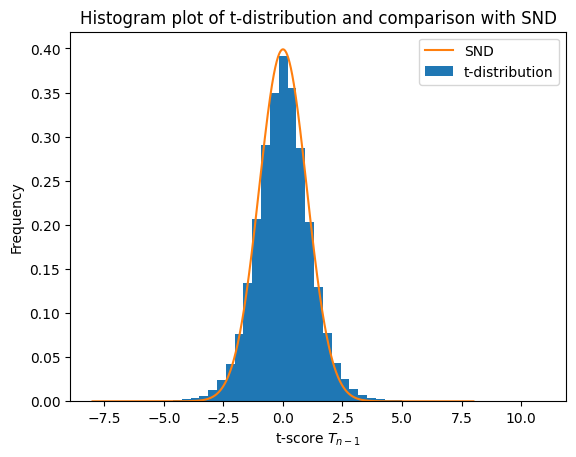

In [ ]:
# t-distribution when sample size n = 10.

import numpy as np
import matplotlib.pyplot as plt

# Random sample from normal distribution. Let's take mean = 4 and S.D. = 1.
# print(np.random.normal(0, 1, size = 3))

# Population mean mu and population standard deviation sigma
mu = 10
sigma = 2

# Normal distribution.
x = np.linspace(-8, 8, 100000)
SND = (1 / np.sqrt(2*np.pi)) * np.exp(-(x**2) / 2)

# Sample size
n = 10

sample_mean_list = []
sample_SD_list = []
for i in range(100000):
    sample = np.random.normal(mu, sigma, size = n)
    sample_mean_list.append(np.mean(sample))
    sample_SD_list.append(np.std(sample, ddof = 1))   # ddof = number of degrees of freedom. The divisor used in the calculations is = (n - ddof), where n = sample size and by defualt ddof = 0. So to get unbiased estimate of the sample S.D. we have divide by (n-1) and hence ddof should be 1.

sample_mean_array = np.array(sample_mean_list)
sample_SD_array = np.array(sample_SD_list)
print('Number of samples = ', np.size(sample_SD_array))

t_score = (sample_mean_array - mu) / (sample_SD_array / np.sqrt(n))

# print('The array of sample SD values of all the samples: ', sample_SD_array)
print('Mean or average of sample mean across all the samples = ', np.mean(sample_mean_array))
print('Mean or average of sample SD across all the samples = ', np.mean(sample_SD_array))


# Plot

plt.hist(t_score, bins = 50, density = True)   # density = True returns relative freqiency insted of total frequency.
plt.plot(x, SND)
plt.xlabel('t-score $T_{n-1}$')
plt.ylabel('Frequency')
plt.title('Histogram plot of t-distribution and comparison with SND')
plt.legend(['SND', 't-distribution'])
plt.show()


Number of samples =  100000
Mean or average of sample mean across all the samples =  10.001352509518316
Mean or average of sample SD across all the samples =  1.972066829702634


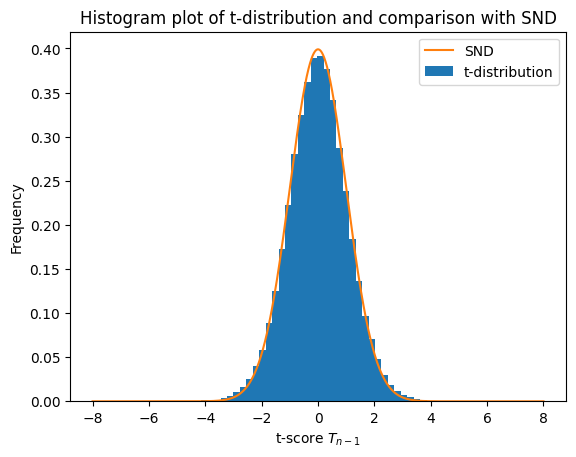

In [ ]:
# t-distribution when sample size n = 20.

import numpy as np
import matplotlib.pyplot as plt

# Random sample from normal distribution. Let's take mean = 4 and S.D. = 1.
# print(np.random.normal(0, 1, size = 3))

# Population mean mu and population standard deviation sigma
mu = 10
sigma = 2

# Normal distribution.
x = np.linspace(-8, 8, 100000)
SND = (1 / np.sqrt(2*np.pi)) * np.exp(-(x**2) / 2)

# Sample size
n = 20

sample_mean_list = []
sample_SD_list = []
for i in range(100000):
    sample = np.random.normal(mu, sigma, size = n)
    sample_mean_list.append(np.mean(sample))
    sample_SD_list.append(np.std(sample, ddof = 1))   # ddof = number of degrees of freedom. The divisor used in the calculations is = (n - ddof), where n = sample size and by defualt ddof = 0. So to get unbiased estimate of the sample S.D. we have divide by (n-1) and hence ddof should be 1.

sample_mean_array = np.array(sample_mean_list)
sample_SD_array = np.array(sample_SD_list)
print('Number of samples = ', np.size(sample_SD_array))

t_score = (sample_mean_array - mu) / (sample_SD_array / np.sqrt(n))

# print('The array of sample SD values of all the samples: ', sample_SD_array)
print('Mean or average of sample mean across all the samples = ', np.mean(sample_mean_array))
print('Mean or average of sample SD across all the samples = ', np.mean(sample_SD_array))


# Plot

plt.hist(t_score, bins = 50, density = True)   # density = True returns relative freqiency insted of total frequency.
plt.plot(x, SND)
plt.xlabel('t-score $T_{n-1}$')
plt.ylabel('Frequency')
plt.title('Histogram plot of t-distribution and comparison with SND')
plt.legend(['SND', 't-distribution'])
plt.show()


Number of samples =  100000
Mean or average of sample mean across all the samples =  9.998548998024448
Mean or average of sample SD across all the samples =  1.9815221235249079


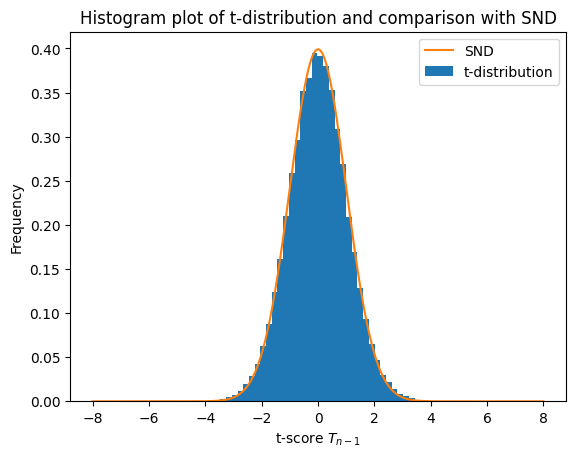

In [ ]:
# t-distribution when sample size n = 30.

import numpy as np
import matplotlib.pyplot as plt

# Random sample from normal distribution. Let's take mean = 4 and S.D. = 1.
# print(np.random.normal(0, 1, size = 3))

# Population mean mu and population standard deviation sigma
mu = 10
sigma = 2

# Normal distribution.
x = np.linspace(-8, 8, 100000)
SND = (1 / np.sqrt(2*np.pi)) * np.exp(-(x**2) / 2)

# Sample size
n = 30

sample_mean_list = []
sample_SD_list = []
for i in range(100000):
    sample = np.random.normal(mu, sigma, size = n)
    sample_mean_list.append(np.mean(sample))
    sample_SD_list.append(np.std(sample, ddof = 1))   # ddof = number of degrees of freedom. The divisor used in the calculations is = (n - ddof), where n = sample size and by defualt ddof = 0. So to get unbiased estimate of the sample S.D. we have divide by (n-1) and hence ddof should be 1.

sample_mean_array = np.array(sample_mean_list)
sample_SD_array = np.array(sample_SD_list)
print('Number of samples = ', np.size(sample_SD_array))

t_score = (sample_mean_array - mu) / (sample_SD_array / np.sqrt(n))

# print('The array of sample SD values of all the samples: ', sample_SD_array)
print('Mean or average of sample mean across all the samples = ', np.mean(sample_mean_array))
print('Mean or average of sample SD across all the samples = ', np.mean(sample_SD_array))


# Plot

plt.hist(t_score, bins = 50, density = True)   # density = True returns relative freqiency insted of total frequency.
plt.plot(x, SND)
plt.xlabel('t-score $T_{n-1}$')
plt.ylabel('Frequency')
plt.title('Histogram plot of t-distribution and comparison with SND')
plt.legend(['SND', 't-distribution'])
plt.show()


Number of samples =  100000
Mean or average of sample mean across all the samples =  10.00035901513613
Mean or average of sample SD across all the samples =  1.9950435493181389


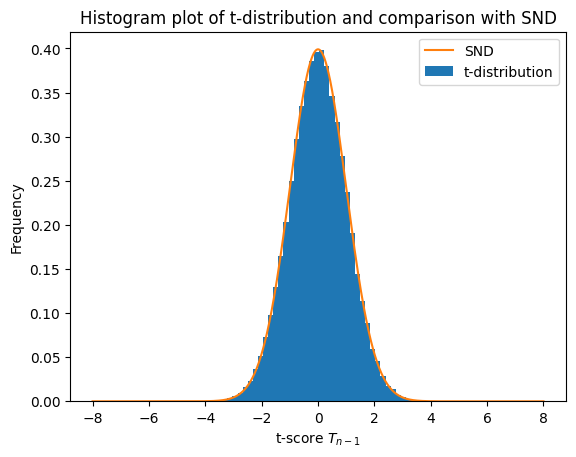

In [ ]:
# t-distribution when sample size n = 100.

import numpy as np
import matplotlib.pyplot as plt

# Random sample from normal distribution. Let's take mean = 4 and S.D. = 1.
# print(np.random.normal(0, 1, size = 3))

# Population mean mu and population standard deviation sigma
mu = 10
sigma = 2

# Normal distribution.
x = np.linspace(-8, 8, 100000)
SND = (1 / np.sqrt(2*np.pi)) * np.exp(-(x**2) / 2)

# Sample size
n = 100

sample_mean_list = []
sample_SD_list = []
for i in range(100000):
    sample = np.random.normal(mu, sigma, size = n)
    sample_mean_list.append(np.mean(sample))
    sample_SD_list.append(np.std(sample, ddof = 1))   # ddof = number of degrees of freedom. The divisor used in the calculations is = (n - ddof), where n = sample size and by defualt ddof = 0. So to get unbiased estimate of the sample S.D. we have divide by (n-1) and hence ddof should be 1.

sample_mean_array = np.array(sample_mean_list)
sample_SD_array = np.array(sample_SD_list)
print('Number of samples = ', np.size(sample_SD_array))

t_score = (sample_mean_array - mu) / (sample_SD_array / np.sqrt(n))

# print('The array of sample SD values of all the samples: ', sample_SD_array)
print('Mean or average of sample mean across all the samples = ', np.mean(sample_mean_array))
print('Mean or average of sample SD across all the samples = ', np.mean(sample_SD_array))


# Plot

plt.hist(t_score, bins = 50, density = True)   # density = True returns relative freqiency insted of total frequency.
plt.plot(x, SND)
plt.xlabel('t-score $T_{n-1}$')
plt.ylabel('Frequency')
plt.title('Histogram plot of t-distribution and comparison with SND')
plt.legend(['SND', 't-distribution'])
plt.show()


**Some analysis of the student's $t$-distribution:**

1. The student's $t$-distribution is also symmetric about the $y$-axis like the SND. So, it has mean = 0. But at 0, the peak height is lesser for $t$-distribution than SND or $z$-distribution which indicates less area under the curve around the centre/mean for $t$-distribution (this is clear from the peak height of histogram plots and the line plot of SND) and that area has been pushed out to the tails on both sides. The $t$-distribution has more area under the tails than the SND. This is important because in the interval estimator of $\mu$ we were always looking for distributing our uncertainty $\alpha$ among the tails and figuring out what interval we can get. Since for the student's $t$-distribution the more area is under the tails (i.e., more area away from the mean = 0), the interval length become larger or more uncertain for the given confidence/probability. \\
So, the student's $t$-distribution has more under the "tails" than $N(0,1) \implies$ higher uncertainty or higher interval length for the given confidence/probability (**price of not knowing the population S.D. $\sigma$**).

2. We notice that as the sample size $n$ increases the $t$-distribution peak height become taller and the tails are reduced in height (this is clear from the histogram plots and the line curve of SND) i.e., more area are getting transferred from the tails towards the centre/mean (more density closer to the mean). This reduces the uncertainty or the interval length. At very large value of $n$ the two distributions start to look similar. \\
So, whenever $\sigma$ is known use the SND or $z$-distribution and when $\sigma$ is unknown use the SND or $t$-distribution (even though the student's $t$-distribution starts to look similar to SND).

3. In the above we also printed the mean or average of sample mean ($\bar{X}$) and sample S.D. ($S$) taken over 100000 samples. We notice that the as the sample size $n$ increases, these averages converge to the population mean $\mu$ and population S.D. ($\sigma$), respectively.